In [3]:
#Analysis
#1. Temperatures becomes warmer as lattitude approaches equator, and colder as you move away, almost equally so in eah hemoshpere.
#2. Humidity, as expected, is not related to lattitude. 
#3. Cloudniness, like humidity is related to the moisture in the air and in the graph,is not related to lattutude.
#4. Windspeed, is not related to lattitude. 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint

# Import API key
#import api_keys
   
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [5]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


529

In [7]:
print (cities[425:450])

['najran', 'victor harbor', 'soldotna', 'whitehorse', 'aleksandrov gay', 'qidong', 'cabo san lucas', 'inirida', 'malanje', 'camopi', 'seoul', 'yeppoon', 'cidreira', 'baherden', 'jalu', 'bermeo', 'bolungarvik', 'grants', 'hoquiam', 'sitio novo do tocantins', 'aksu', 'salalah', 'gotsu', 'nkhata bay', 'bagdarin']


## Perform API Calls

In [8]:
# OpenWeatherMap API Key
api_key="24c85411d38cdd9b4b1601ca2a92276d"

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key+"&q=[cities]"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "24c85411d38cdd9b4b1601ca2a92276d"

city_data=[]

      
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | gamba
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | esperance
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | moron
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | la baule-escoublac
Processing Record 13 of Set 1 | aflao
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | reconquista
Processing Record 17 of Set 1 | arica
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | diamantino
Processing Record 21 of Set 1 | san cristobal
Processing Record 22 of Set 1 | d

Processing Record 32 of Set 4 | peniche
Processing Record 33 of Set 4 | bambous virieux
Processing Record 34 of Set 4 | ayni
Processing Record 35 of Set 4 | roma
Processing Record 36 of Set 4 | linqiong
Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | narsaq
Processing Record 39 of Set 4 | sodertalje
City not found. Skipping...
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | banes
Processing Record 44 of Set 4 | huarmey
Processing Record 45 of Set 4 | sakaraha
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | renukut
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | sao felix do xingu
Processing Record 1 of Set 5 | blagoyevo
Processing Record 2 of Set 5 | kargasok
Processing Record 3 of Set 5 | matamoros
Processing Record 4 of Set 5 | saskylakh
Processing Reco

Processing Record 23 of Set 8 | leshukonskoye
Processing Record 24 of Set 8 | evanston
Processing Record 25 of Set 8 | geraldton
Processing Record 26 of Set 8 | ixtapa
Processing Record 27 of Set 8 | ialibu
Processing Record 28 of Set 8 | bastia
Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | tiksi
Processing Record 31 of Set 8 | sorvag
City not found. Skipping...
Processing Record 32 of Set 8 | novyy urengoy
Processing Record 33 of Set 8 | khakhea
Processing Record 34 of Set 8 | sereflikochisar
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | irbeyskoye
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | lucapa
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | tazovskiy
Processing Record 41 of Set 8 | alofi
Processing Record 42 of Set 8 | lexington park
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | uruacu
Processing Record 45 of Set 8 | nantucket
Processing Record 46 of Se

In [9]:
weather_df=pd.DataFrame(city_data) 

weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
469,merritt island,1,US,1541246580,85,28.54,-80.67,64.22,9.17
470,diffa,24,NE,1541250571,19,13.32,12.61,98.92,9.89
471,maputo,40,MZ,1541246400,47,-25.97,32.57,78.80,11.41
472,les escoumins,100,CA,1541250572,99,48.35,-69.40,34.97,7.36
473,sulangan,64,PH,1541250572,100,11.14,123.72,83.80,16.87


In [10]:
# Extract relevant fields from the data frame
city_data_pd = pd.DataFrame(city_data)

lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          474
Cloudiness    474
Country       474
Date          474
Humidity      474
Lat           474
Lng           474
Max Temp      474
Wind Speed    474
dtype: int64

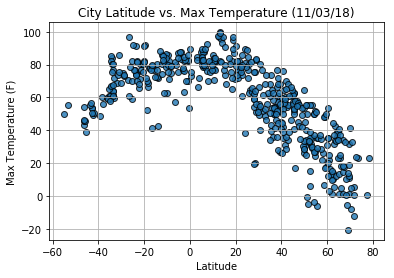

In [11]:
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

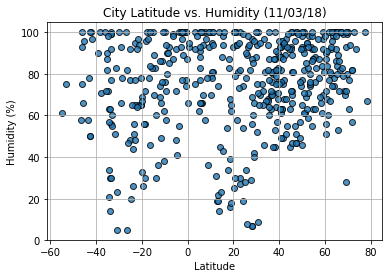

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

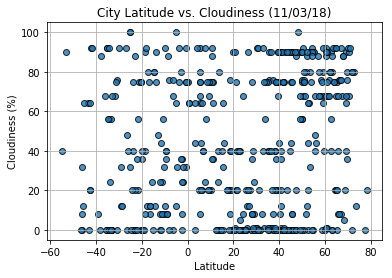

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

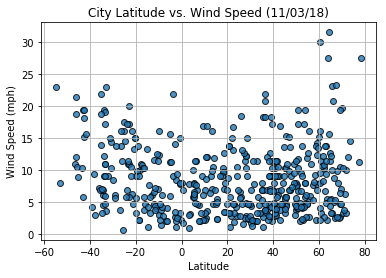

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()